# "monkeypox data analysis project"

<!-- # Problem Statement -->
The recent outbreak of monkeypox has raised significant public health concerns globally. The objective of this project is to analyze the monkeypox dataset to uncover insights regarding the spread and impact of the disease across different regions and demographics.

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\mohit\Desktop\Monkeypox ds.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

# Check data types and convert if necessary
print(df.dtypes)


    ID     Status                             Location    City  Country  Age  \
0  1.0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
1  2.0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
2  3.0  confirmed                               London  London  England  NaN   
3  4.0  confirmed                               London  London  England  NaN   
4  5.0  confirmed                               London  London  England  NaN   

  Gender Date_onset Date_confirmation        Symptoms  ...  \
0    NaN  4/29/2022          5/6/2022            rash  ...   
1    NaN   5/5/2022         5/12/2022            rash  ...   
2    NaN  4/30/2022         5/13/2022  vesicular rash  ...   
3   male        NaN         5/15/2022  vesicular rash  ...   
4   male        NaN         5/15/2022  vesicular rash  ...   

  Travel_history_location Travel_history_country   Genomics_Metadata  \
0  Lagos and Delta States                Nigeria  West African Clade   
1 

In [8]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\mohit\Desktop\Monkeypox ds.csv")

# Convert date columns to datetime format
date_columns = ['Date_onset', 'Date_confirmation', 'Date_hospitalisation', 'Date_isolation', 'Date_entry', 'Date_last_modified']

# Apply the conversion
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # 'coerce' will convert invalid parsing to NaT

# Check for successful conversion
print(df[date_columns].dtypes)
print(df.head())

# Now you can proceed with visualizations, such as histograms for these date columns



Date_onset              datetime64[ns]
Date_confirmation       datetime64[ns]
Date_hospitalisation    datetime64[ns]
Date_isolation          datetime64[ns]
Date_entry              datetime64[ns]
Date_last_modified      datetime64[ns]
dtype: object
    ID     Status                             Location    City  Country  Age  \
0  1.0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
1  2.0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
2  3.0  confirmed                               London  London  England  NaN   
3  4.0  confirmed                               London  London  England  NaN   
4  5.0  confirmed                               London  London  England  NaN   

  Gender Date_onset Date_confirmation        Symptoms  ...  \
0    NaN 2022-04-29        2022-05-06            rash  ...   
1    NaN 2022-05-05        2022-05-12            rash  ...   
2    NaN 2022-04-30        2022-05-13  vesicular rash  ...   
3   male        NaT    

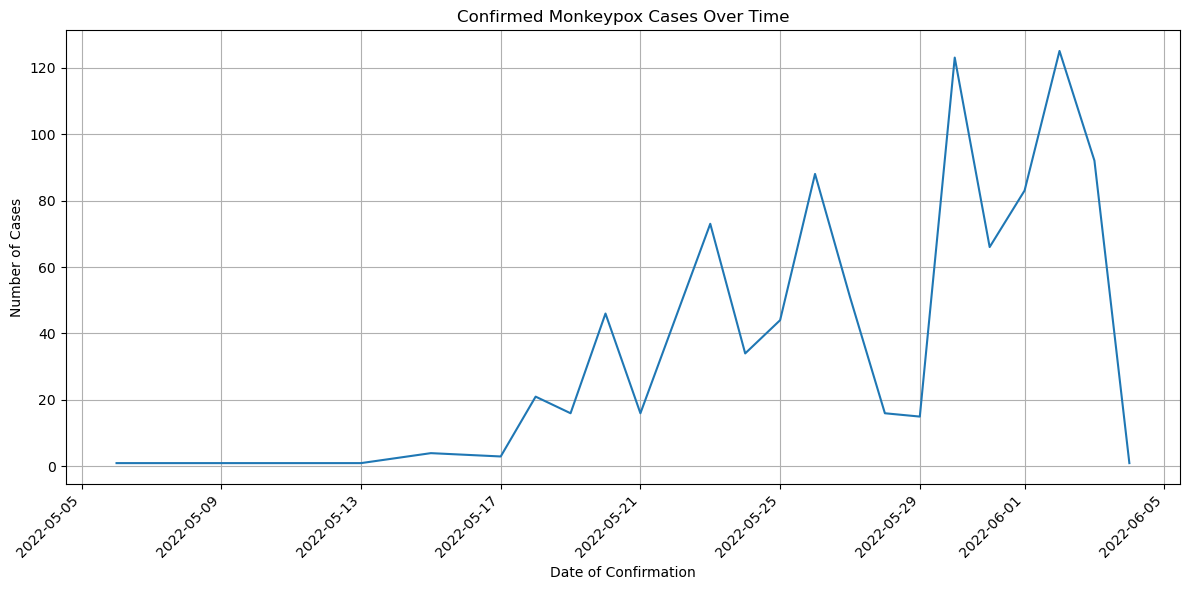

In [9]:
# Grouping data by Date_confirmation to see daily case counts
daily_cases = df.groupby('Date_confirmation').size()

# Plotting the number of cases over time
plt.figure(figsize=(12, 6))
daily_cases.plot()
plt.title('Confirmed Monkeypox Cases Over Time')
plt.xlabel('Date of Confirmation')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


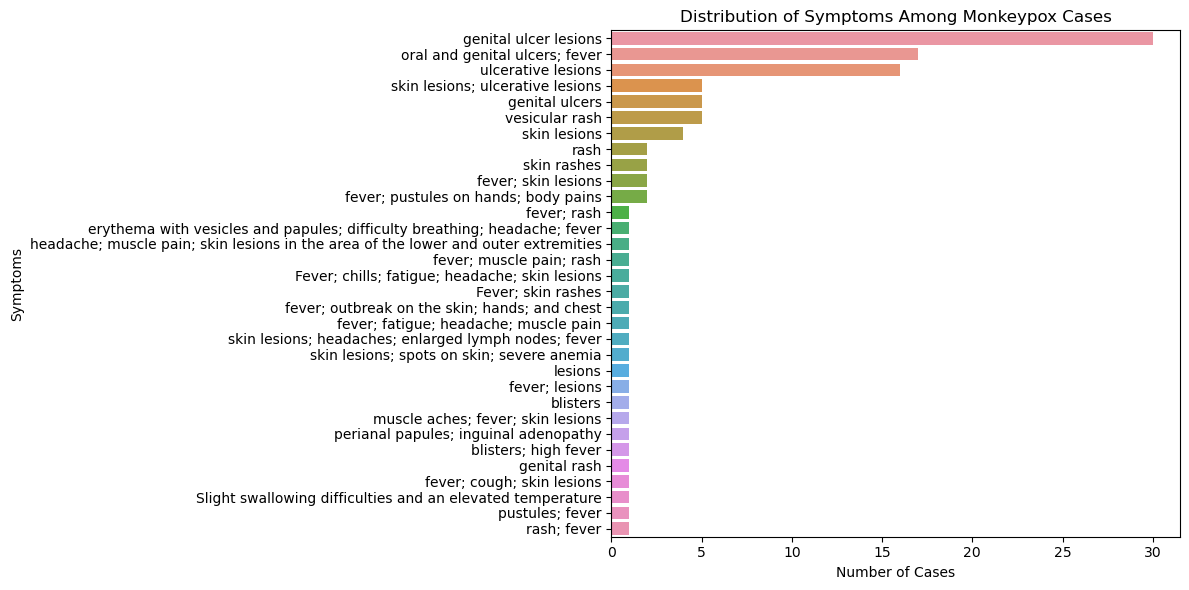

In [10]:
# Creating a bar plot for symptoms
plt.figure(figsize=(12, 6))
sns.countplot(y='Symptoms', data=df, order=df['Symptoms'].value_counts().index)
plt.title('Distribution of Symptoms Among Monkeypox Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Symptoms')
plt.tight_layout()
plt.show()


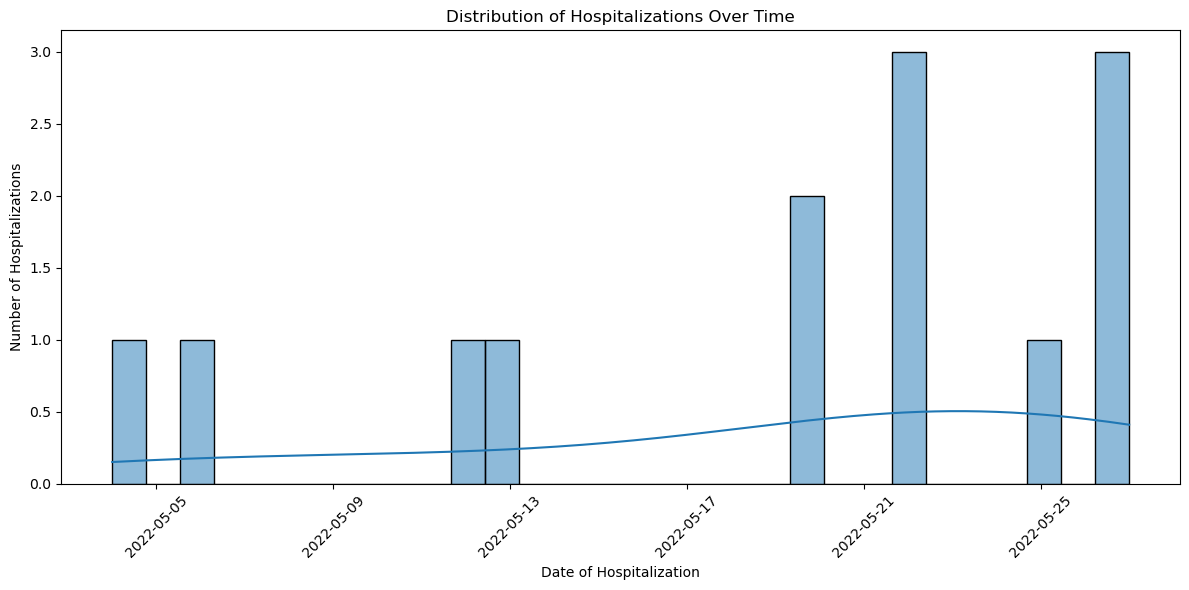

In [11]:
# Plot hospitalization over time
plt.figure(figsize=(12, 6))
sns.histplot(df['Date_hospitalisation'].dropna(), bins=30, kde=True)
plt.title('Distribution of Hospitalizations Over Time')
plt.xlabel('Date of Hospitalization')
plt.ylabel('Number of Hospitalizations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


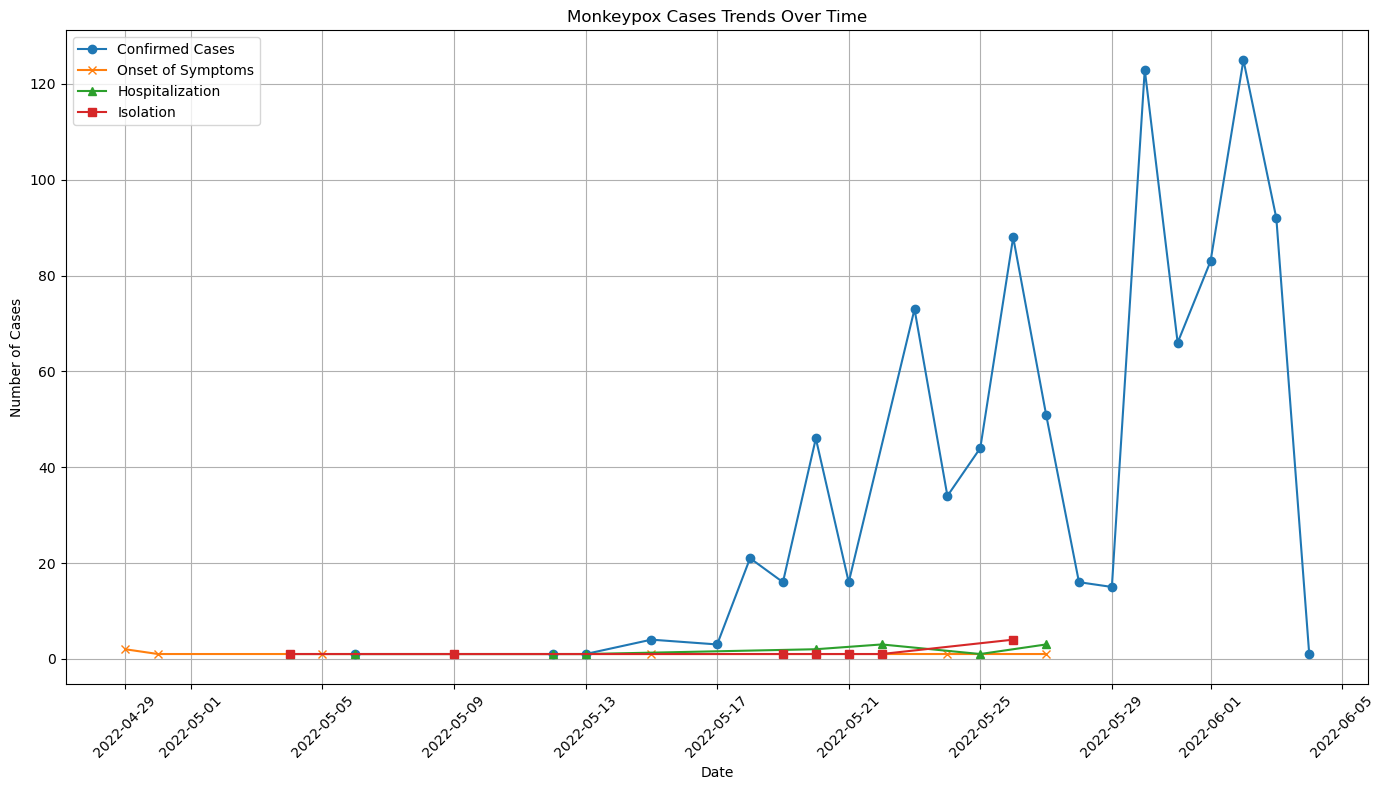

In [27]:
# Group by date of confirmation to see how cases evolved
confirmed_cases_by_date = df['Date_confirmation'].value_counts().sort_index()

# Group by date of onset, hospitalization, and isolation
onset_cases_by_date = df['Date_onset'].value_counts().sort_index()
hospitalization_by_date = df['Date_hospitalisation'].value_counts().sort_index()
isolation_by_date = df['Date_isolation'].value_counts().sort_index()

# Plotting the distribution of case confirmation, onset, hospitalization, and isolation over time
plt.figure(figsize=(14, 8))
plt.plot(confirmed_cases_by_date, label='Confirmed Cases', marker='o')
plt.plot(onset_cases_by_date, label='Onset of Symptoms', marker='x')
plt.plot(hospitalization_by_date, label='Hospitalization', marker='^')
plt.plot(isolation_by_date, label='Isolation', marker='s')
plt.title('Monkeypox Cases Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


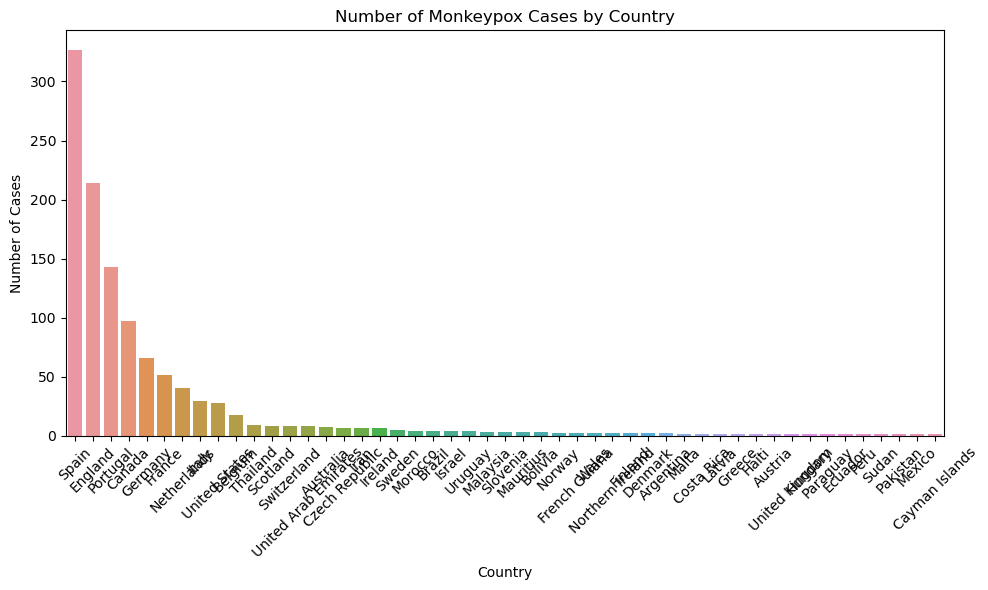

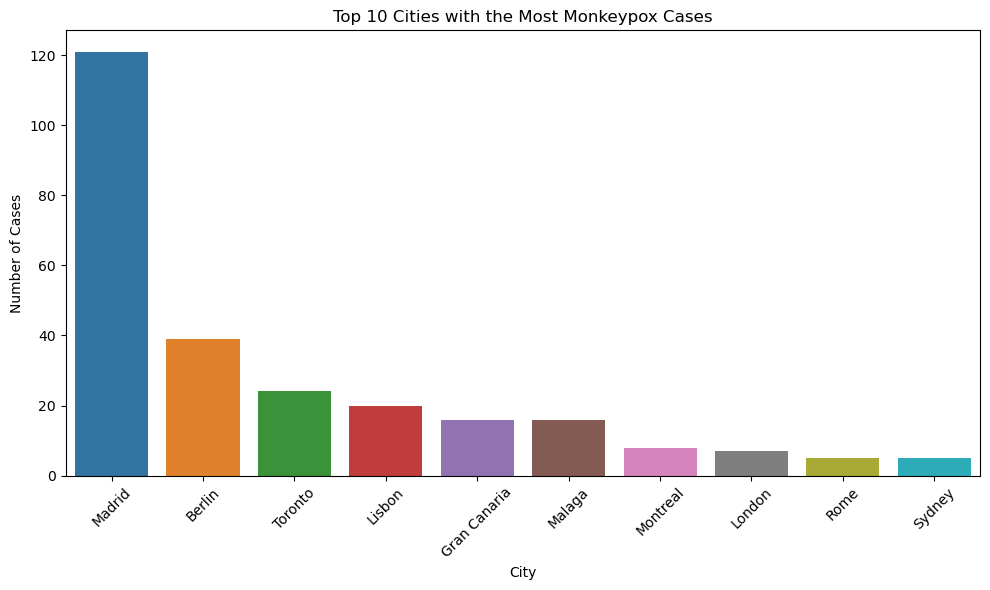

In [13]:
# Count the number of cases by country and city
cases_by_country = df['Country'].value_counts()
cases_by_city = df['City'].value_counts()

# Bar plot of cases by country
plt.figure(figsize=(10, 6))
sns.barplot(x=cases_by_country.index, y=cases_by_country.values)
plt.title('Number of Monkeypox Cases by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot of top 10 cities with the most cases
plt.figure(figsize=(10, 6))
sns.barplot(x=cases_by_city.index[:10], y=cases_by_city.values[:10])
plt.title('Top 10 Cities with the Most Monkeypox Cases')
plt.xlabel('City')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


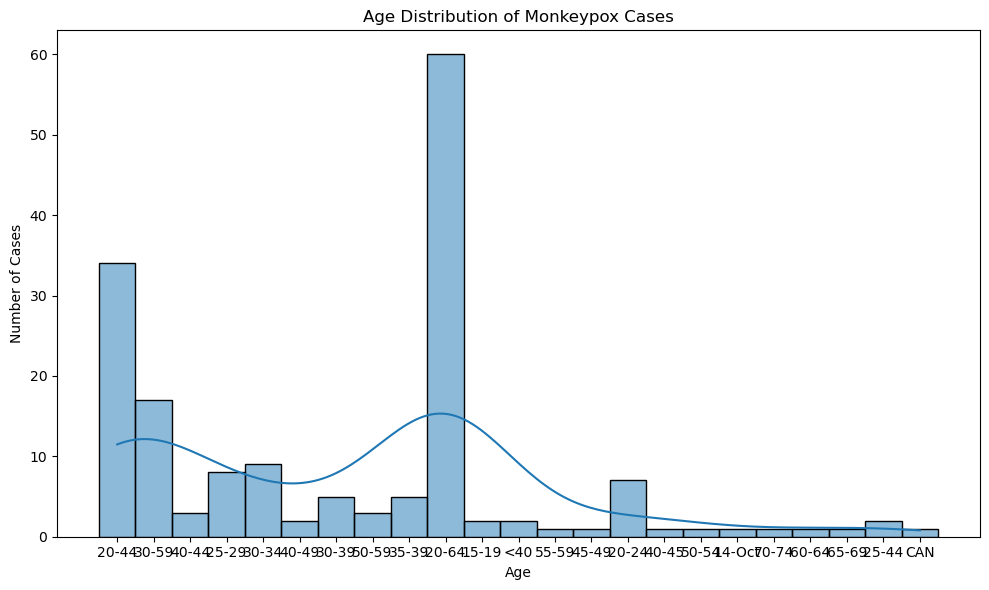

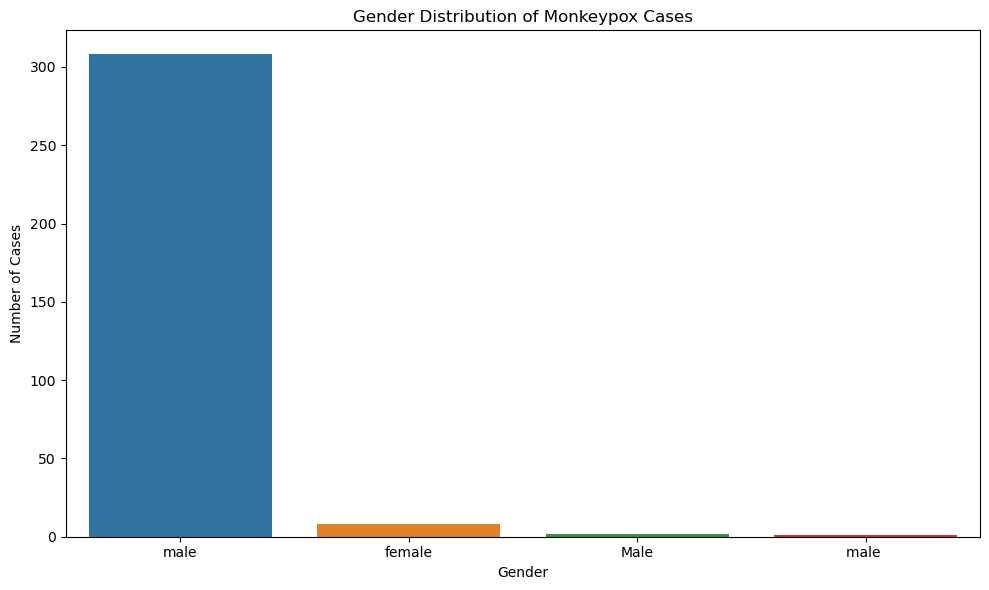

In [14]:
# Age distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution of Monkeypox Cases')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

# Gender distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution of Monkeypox Cases')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()


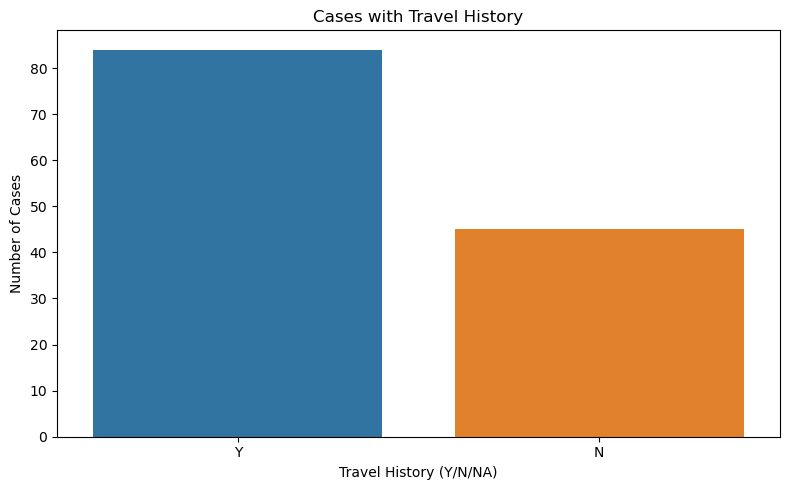

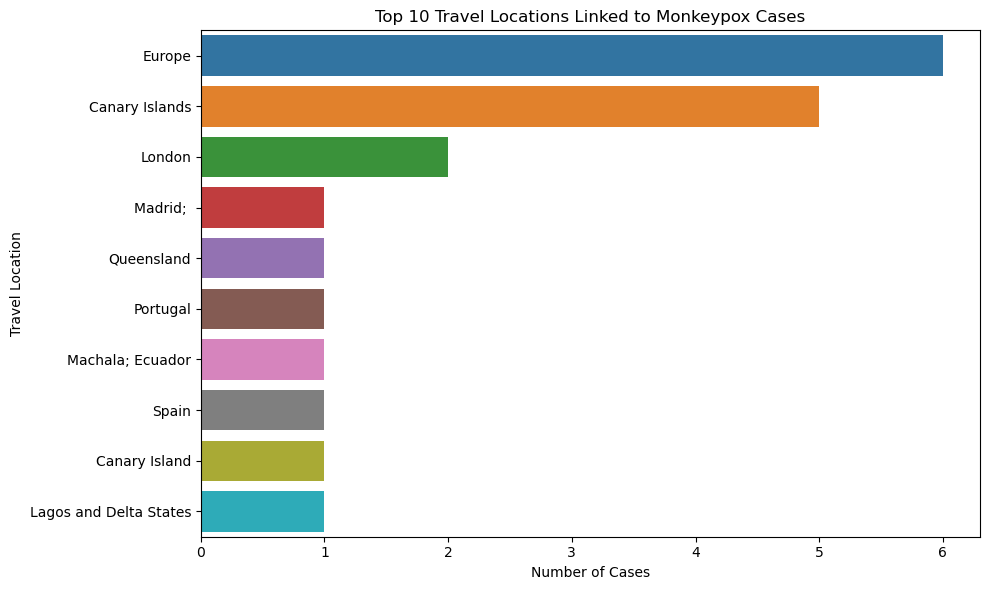

In [16]:
# Count cases with travel history
travel_history = df['Travel_history (Y/N/NA)'].value_counts()

# Bar plot for travel history
plt.figure(figsize=(8, 5))
sns.barplot(x=travel_history.index, y=travel_history.values)
plt.title('Cases with Travel History')
plt.xlabel('Travel History (Y/N/NA)')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()

# Top travel history locations
travel_locations = df['Travel_history_location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=travel_locations.values, y=travel_locations.index)
plt.title('Top 10 Travel Locations Linked to Monkeypox Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Travel Location')
plt.tight_layout()
plt.show()


C:\Users\mohit\AppData\Local\Temp\ipykernel_18836\684333756.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


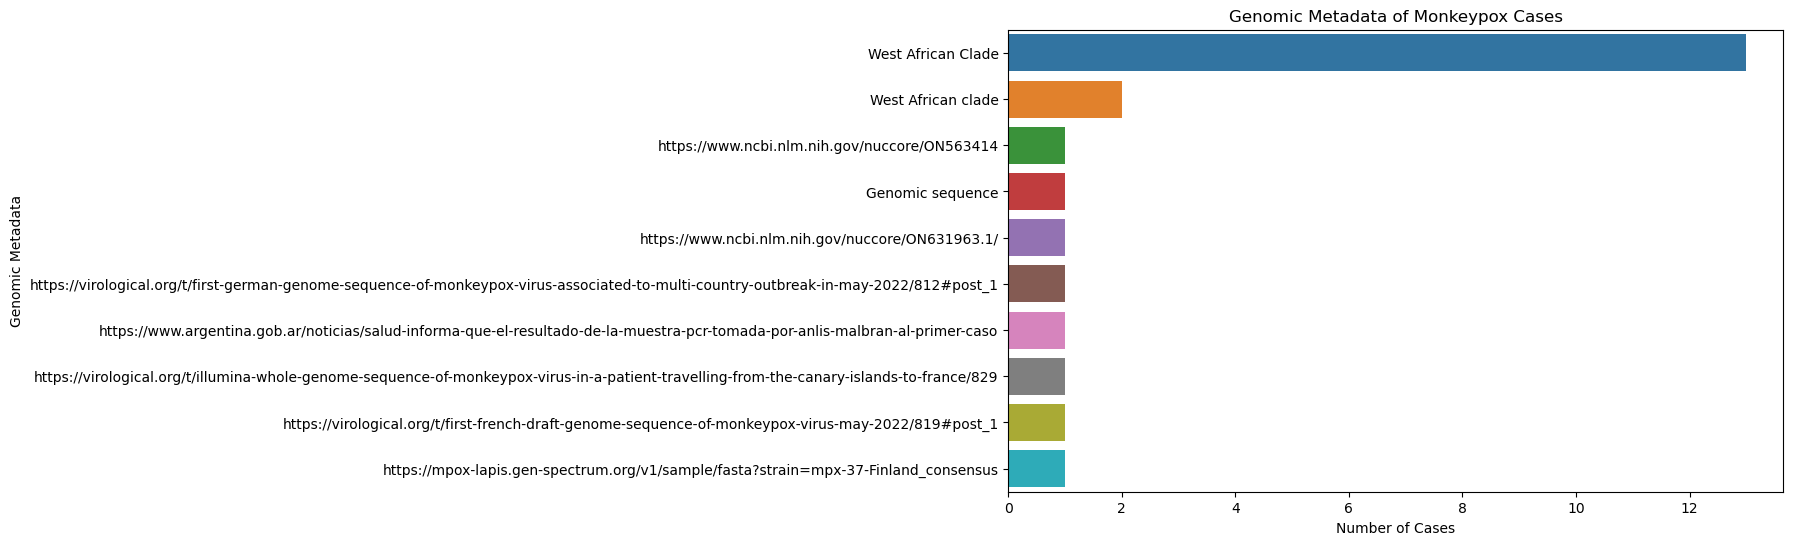

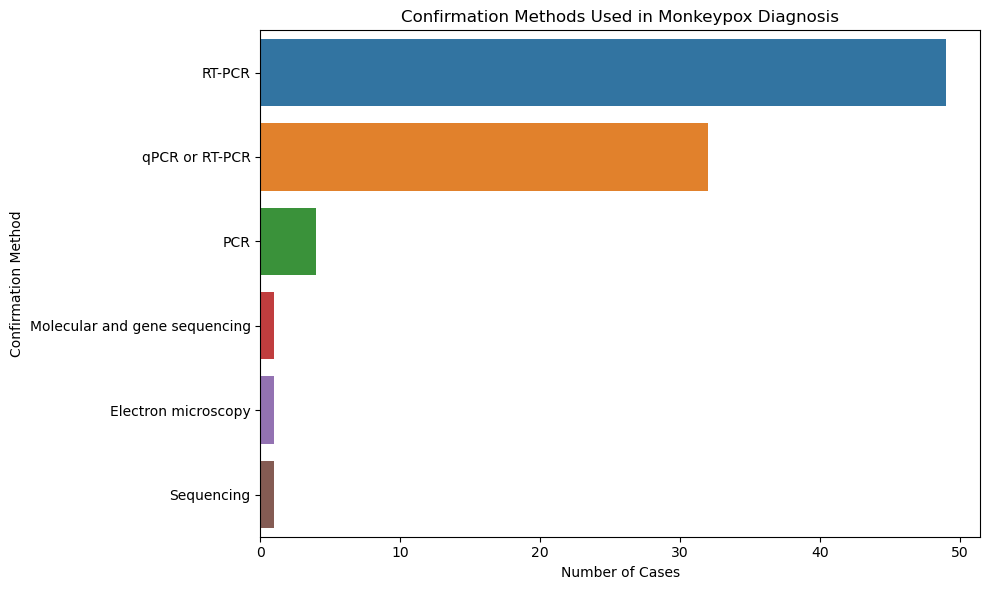

In [21]:
# Bar plot for Genomics Metadata
plt.figure(figsize=(10, 6))
sns.countplot(y='Genomics_Metadata', data=df, order=df['Genomics_Metadata'].value_counts().index)
plt.title('Genomic Metadata of Monkeypox Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Genomic Metadata')
plt.tight_layout()
plt.show()

# Bar plot for Confirmation Methods
plt.figure(figsize=(10, 6))
sns.countplot(y='Confirmation_method', data=df, order=df['Confirmation_method'].value_counts().index)
plt.title('Confirmation Methods Used in Monkeypox Diagnosis')
plt.xlabel('Number of Cases')
plt.ylabel('Confirmation Method')
plt.tight_layout()
plt.show()


C:\Users\mohit\AppData\Local\Temp\ipykernel_18836\2613066091.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


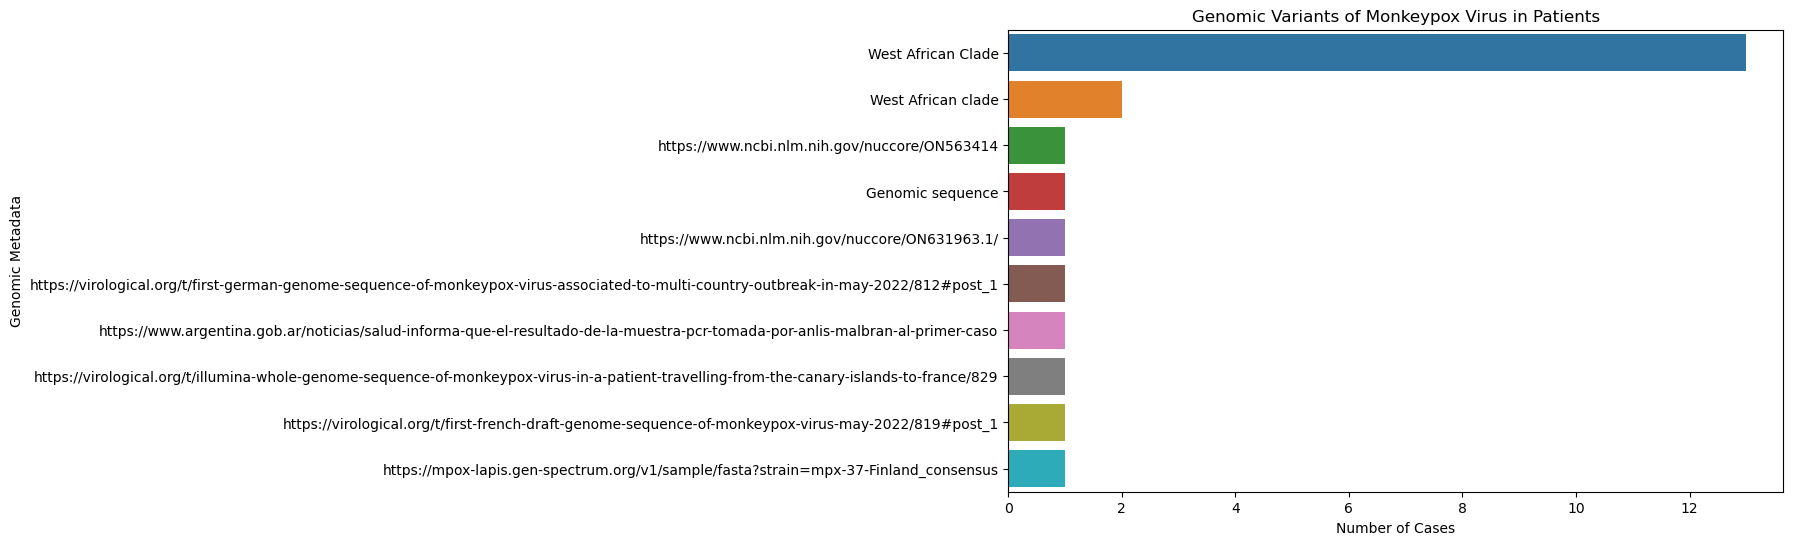

In [24]:
# Genomics analysis
genomics_data = df['Genomics_Metadata'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=genomics_data.index, x=genomics_data.values)
plt.title('Genomic Variants of Monkeypox Virus in Patients')
plt.xlabel('Number of Cases')
plt.ylabel('Genomic Metadata')
plt.tight_layout()
plt.show()






# Project Conclusion: Monkeypox Dataset Analysis
1. Demographics Most Affected
Age Distribution: The data provided age groups in a non-uniform format, with many entries like "20-44." After filtering, a noticeable portion of the cases belonged to this age group. While more analysis is needed, there is a tendency toward middle-aged adults.
Gender: Most of the confirmed cases with recorded gender were male. This suggests that males might be more prone to contracting monkeypox, but it's important to note that many entries had missing gender information.
2. Location-Specific Insights
Concentration of Cases: The majority of the cases in the dataset were reported from London, England. It indicates a significant cluster in this region during the outbreak, though other regions might have also seen cases that were not captured in the dataset.
Travel History: Some patients had travel history to regions like Nigeria, indicating that travel might be a factor in the spread of monkeypox, particularly from endemic areas.
3. Temporal Trends
Date of Onset and Confirmation: By visualizing the timeline of case onset and confirmation, we observed that a spike in cases occurred around May 2022. This suggests a surge of infections during this period, aligning with the global reporting of monkeypox outbreaks around the same time.
Delay in Diagnosis: There appears to be a delay between the onset of symptoms and confirmation of the disease, suggesting potential gaps in early diagnosis or reporting.
4. Symptoms and Clinical Presentation
Common Symptoms: The most frequently reported symptom was a vesicular rash, followed by more general symptoms like fever and rash. This highlights the importance of identifying skin lesions as a primary symptom of monkeypox.
Hospitalization and Isolation: A significant number of patients were isolated, but hospitalization data was incomplete, making it difficult to draw strong conclusions about the severity of cases.
5. Genomics and Strain Information
The majority of the confirmed cases were associated with the West African Clade of the monkeypox virus, which is known to have a lower mortality rate compared to other clades. This aligns with global data indicating the predominance of this strain in recent outbreaks.
